Dataset
[Dataset](https://github.com/Himanshu-1703/reddit-sentiment-analysis/blob/main/data/reddit.csv)

## Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df.shape

(37249, 2)

In [ ]:
df.columns

Index(['clean_comment', 'category'], dtype='object')

In [ ]:
df.sample()['clean_comment'].values

array(['chaliye wages vanakkam '], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
df.isnull().sum()
# We have 100 missing value in comments

,0
clean_comment,100
category,0


In [ ]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
df[df['category'].isna()]

,clean_comment,category


In [ ]:
df.dropna(inplace=True)
# very few missing so dropping those

In [ ]:
df.duplicated().sum()
# we have 350 duplicates, still low, so remove

np.int64(350)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[(df['clean_comment'].str.strip() == '')]
# New line

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [ ]:
df = df[~(df['clean_comment'].str.strip() == '')]
# Remove New Line

In [ ]:
# Comvert all column to lower
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

/tmp/ipython-input-16-1533307093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment'] = df['clean_comment'].str.lower()


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
# Starting with and ending with space
df[df['clean_comment'].apply(lambda x: x.startswith(' ') or x.endswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
# Remove these spaces
df['clean_comment'] = df['clean_comment'].str.strip()
# verify
df[df['clean_comment'].apply(lambda x: x.startswith(' ') or x.endswith(' '))]

,clean_comment,category


In [ ]:
# Check for any comments have URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[#-_@.&+]|[!*||(|\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
df[df['clean_comment'].str.contains(url_pattern)]
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern , regex= True)]
comments_with_urls.head()

/usr/local/lib/python3.11/dist-packages/pandas/core/strings/accessor.py:1327: FutureWarning: Possible set union at position 42
  if regex and re.compile(pat).groups:


,clean_comment,category


In [ ]:
# check for \n
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [ ]:
# Remove new line characters
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category


## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

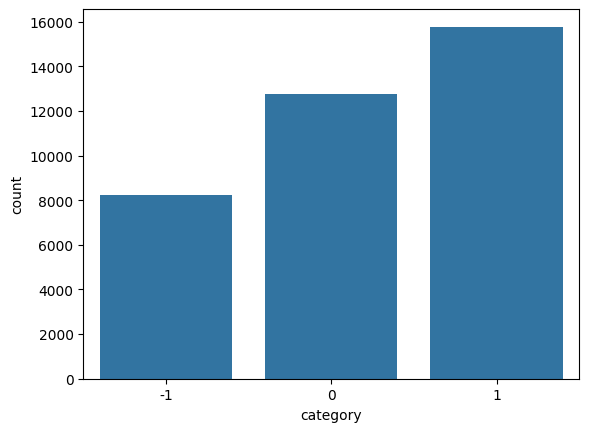

In [ ]:
# Distribution of classes
sns.countplot(x='category', data=df)
plt.show()

In [ ]:
# How many words for each comment, new column
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.head()
# Are positive have more words or Ngative have more words

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [ ]:
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


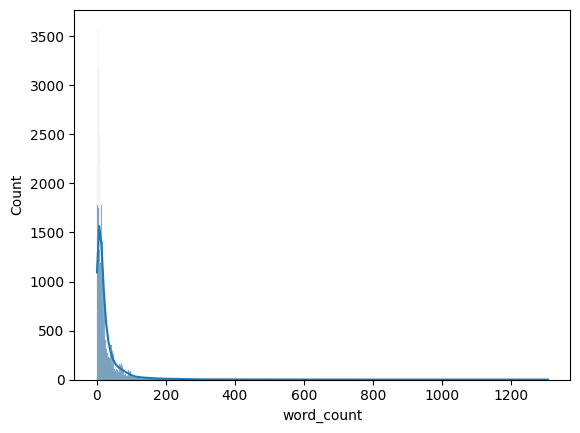

In [ ]:
# Distribution of word_count
sns.histplot(df['word_count'], kde= True)
plt.show()

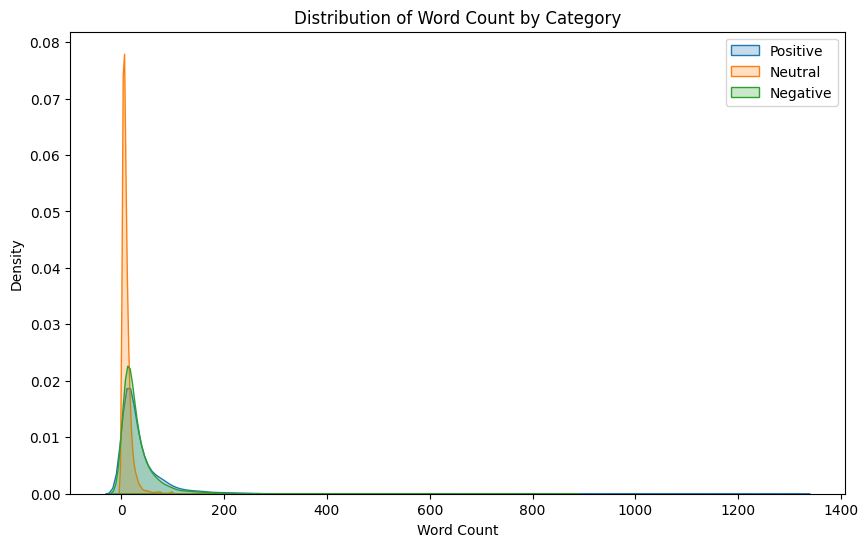

In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot kde for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill= True)

# Plot kde for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill= True)

# Plot kde for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill= True)

# Add titles and Labels
plt.title('Distribution of Word Count by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

            # Neutral distibution have More Word Count

<Axes: ylabel='word_count'>

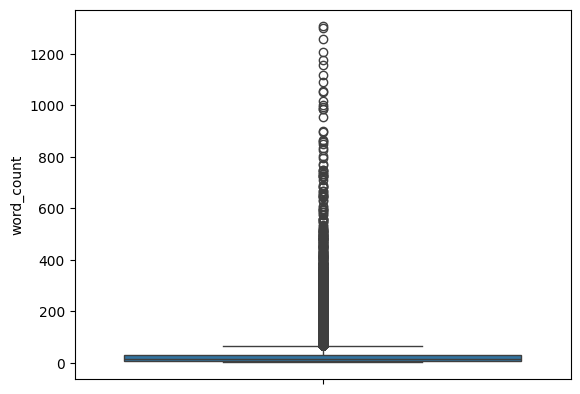

In [ ]:
sns.boxplot(df['word_count'])
# More Outliers

Text(0, 0.5, 'Word Count')

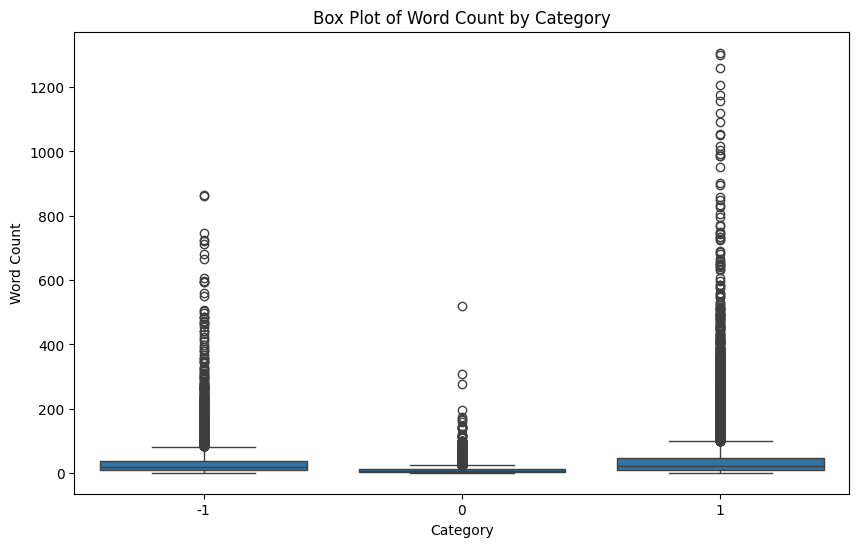

In [ ]:
# Create Box plot b/w 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='word_count', data=df)
plt.title('Box Plot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')

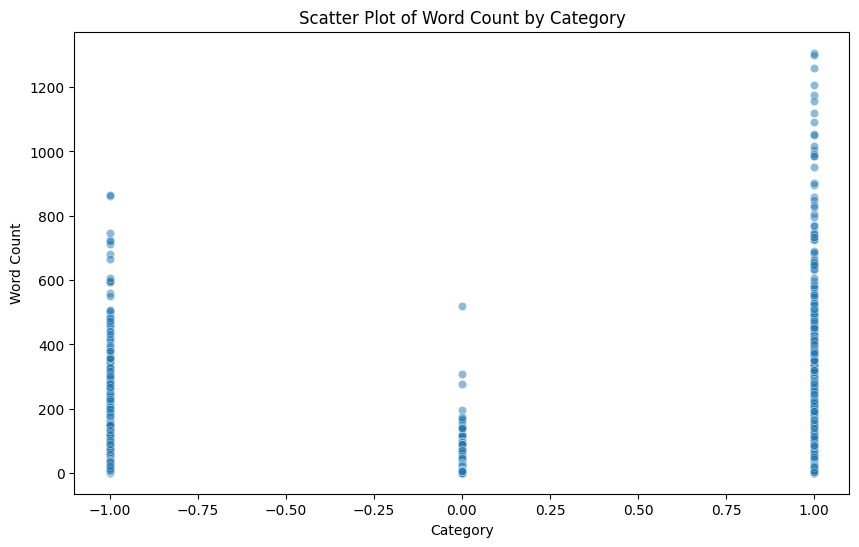

In [ ]:
# Create Scatter plot b/w 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='category', y='word_count', data=df, alpha=0.5)
plt.title('Scatter Plot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

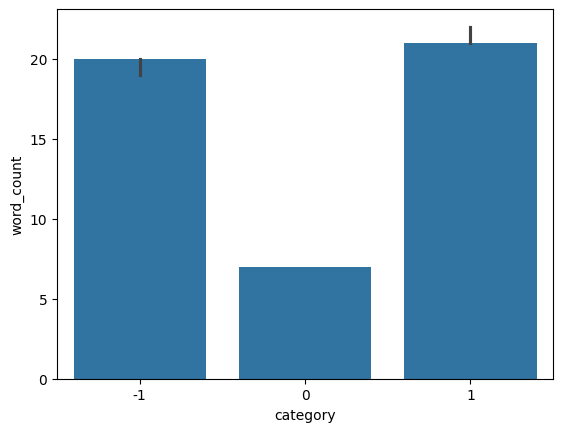

In [ ]:
sns.barplot(x='category', y='word_count', data=df, estimator=np.median)
plt.show()

In [ ]:
# Preprocessing with NLP(Textual Data)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') # punkt is required for word_tokenize

stop_words = set(stopwords.words('english'))

# Create a new Column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,clean_comment,category,word_count,num_stop_words
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


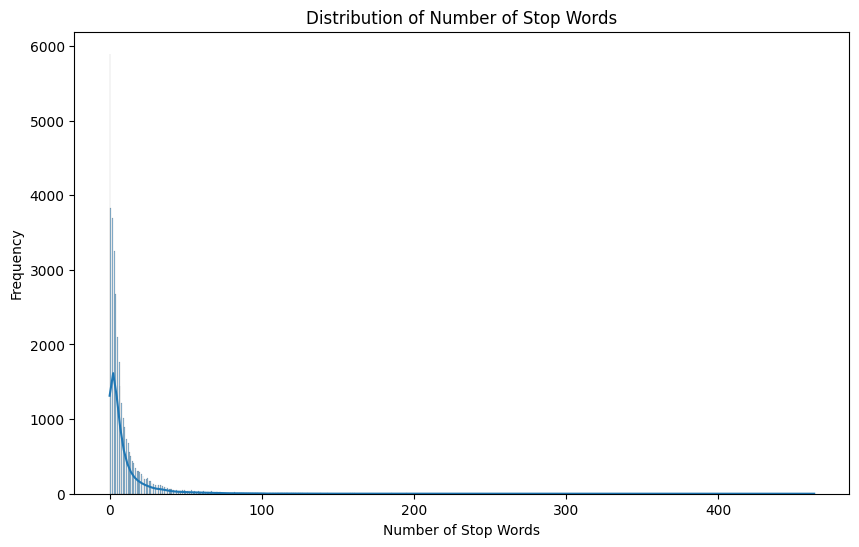

In [ ]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Number of Stop Words')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

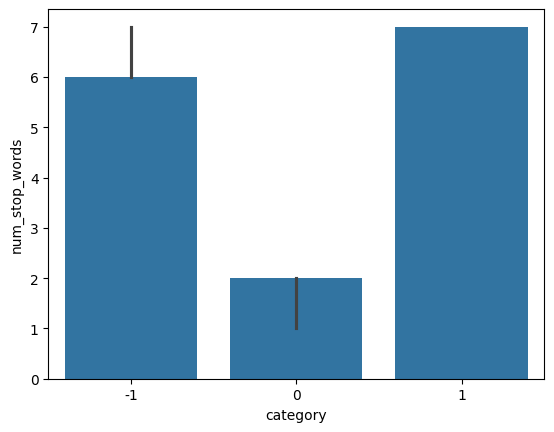

In [ ]:
sns.barplot(x='category', y='num_stop_words', data=df, estimator=np.median)
plt.show()

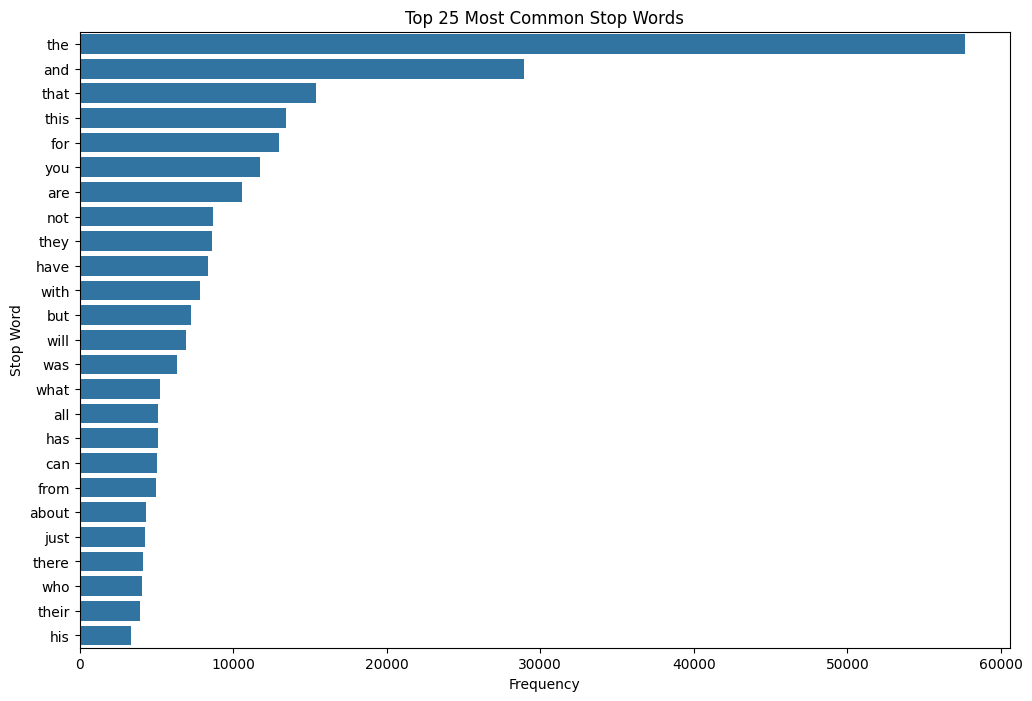

In [ ]:
# Create Frequency Distribution of stop words in 'clean_comment' column
from collections import Counter
stop_words = set(stopwords.words('english'))
# Extract all stop words from the comments using prev defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the frequency of each stop word
most_common_stop_word_freq = Counter(all_stop_words).most_common(25)

# Convert most common stop words to DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_word_freq, columns=['Stop_Word', 'Count'])

# Create a bar plot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Stop_Word', data=top_25_df)
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Frequency')
plt.ylabel('Stop Word')
plt.show()

In [ ]:
# Calculate num_chars
df['num_chars'] = df['clean_comment'].apply(lambda x: len(x))
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [ ]:
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [ ]:
from collections import Counter
# Freq of special characters
all_text = ' '.join(df['clean_comment'])
special_char_freq = Counter(all_text)

char_freq_df = pd.DataFrame(special_char_freq.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)
char_freq_df.head()

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388


In [ ]:
char_freq_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [ ]:
char_freq_df.tail(50)

,character,frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


In [ ]:
# Create column, find punctuations
import string
df['num_punctuation_chars'] = df['clean_comment'].apply(lambda x: len([char for char in x if char in string.punctuation]))
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [ ]:
df['num_punctuation_chars'].describe()


,num_punctuation_chars
count,36793.000000
mean,0.022531
std,0.765155
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,136.000000


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#  Create function to extract the top 25 bigrams

def get_top_ngrams(corpus, num_grams = 2, n=None):
    vec = CountVectorizer(ngram_range=(num_grams, num_grams)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], num_grams=2, n=25)

# Convert into Dataframe
top_25_bigrams = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])
top_25_bigrams.head()



,bigram,count
0,the same,2439
1,for the,1779
2,and the,1709
3,that the,1406
4,they are,1359


/tmp/ipython-input-45-2235633585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=top_25_bigrams, palette='coolwarm')


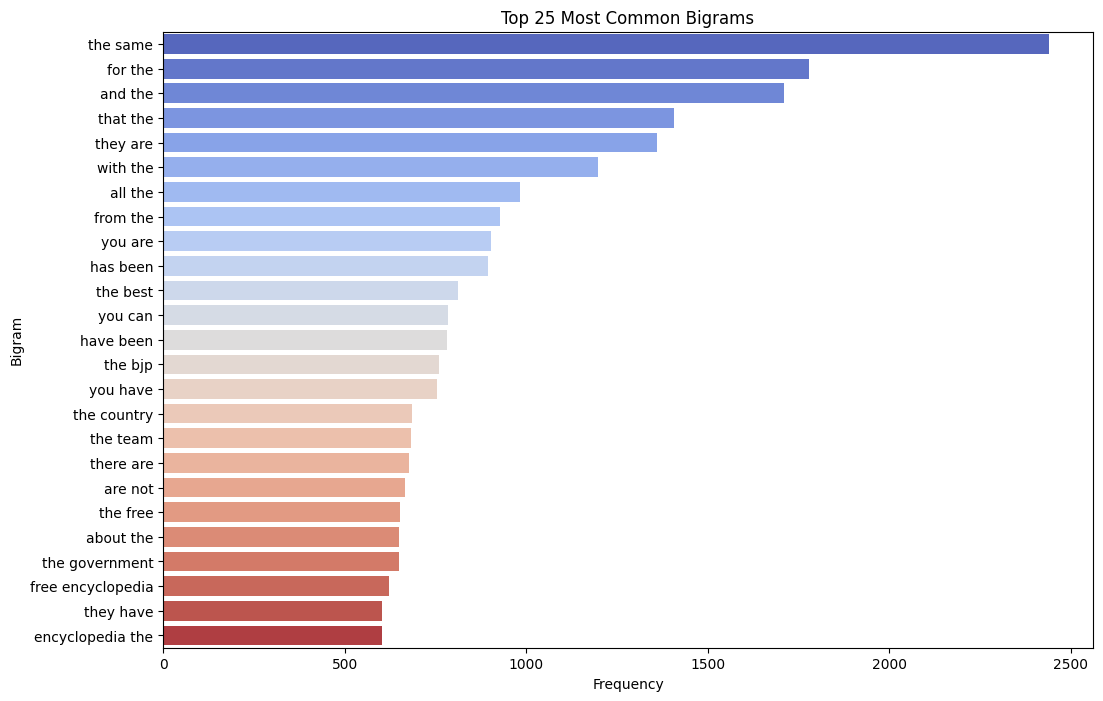

In [ ]:
# Plot the countplot fpr the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='bigram', data=top_25_bigrams, palette='coolwarm')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

In [ ]:
# Create a function to extract top 25 trigrams
top_25_trigrams = get_top_ngrams(df['clean_comment'], num_grams=3, n=25)

# Convert into Dataframe
top_25_trigrams = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])
top_25_trigrams.head()


,trigram,count
0,the free encyclopedia,623
1,free encyclopedia the,604
2,encyclopedia the team,598
3,lot the same,399
4,the best overall,375


/tmp/ipython-input-47-3119183108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='trigram', data=top_25_trigrams, palette='coolwarm')


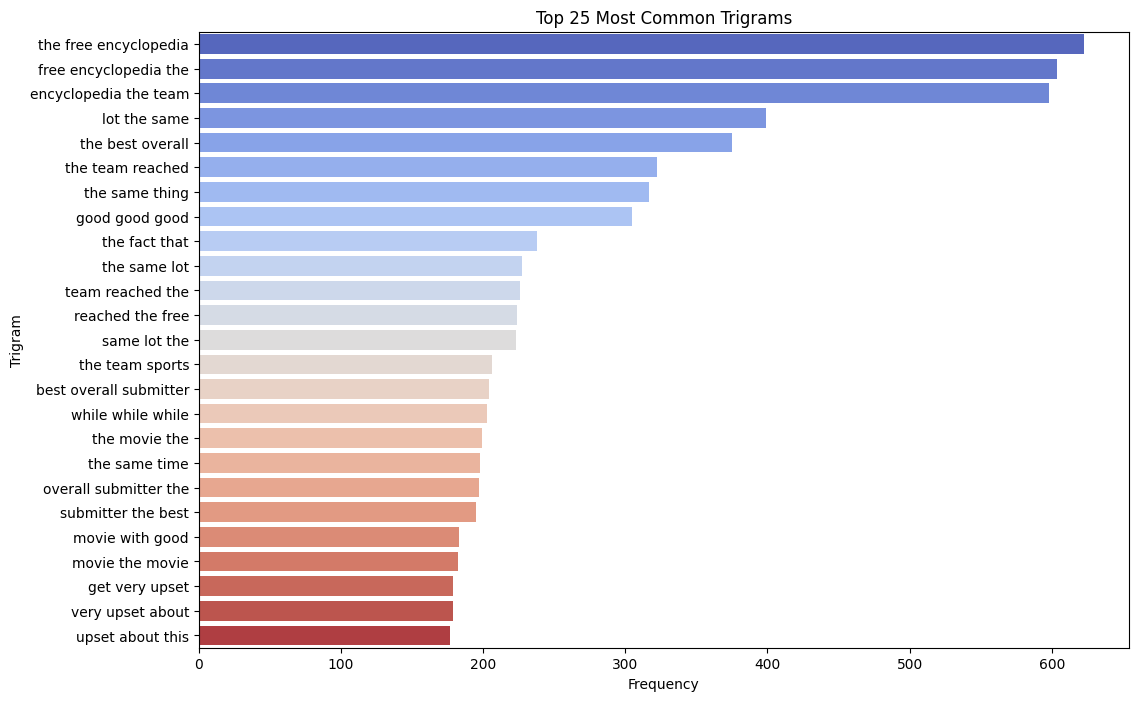

In [ ]:
# Plot the countplot fpr the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='trigram', data=top_25_trigrams, palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

In [ ]:
# Remove special characters
import re
df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^\w\s!?.,]', '', str(x)))
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [ ]:
all_text = ' '.join(df['clean_comment'])

# Count Freq of each character
special_char_freq = Counter(all_text)

# Convert the character frequency into a DF for better display
char_freq_df = pd.DataFrame(special_char_freq.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)
char_freq_df.head()

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388


In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [ ]:
from nltk.corpus import stopwords

# Keeping essential stopwords that contributes to sentiment analysis
non_essential_stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove non-essential stop words
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in non_essential_stop_words]))
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [ ]:
# Lemmatizer
# Play, Plays, Played, Playing => Play (we Reduce Dimension)
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define Lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment' (with no stop words)
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


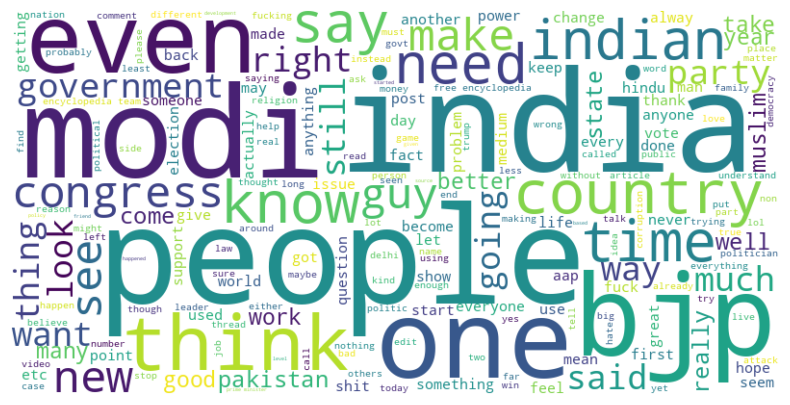

In [ ]:
# Word Count visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

plot_word_cloud(df['clean_comment'])

/tmp/ipython-input-54-1571540341.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


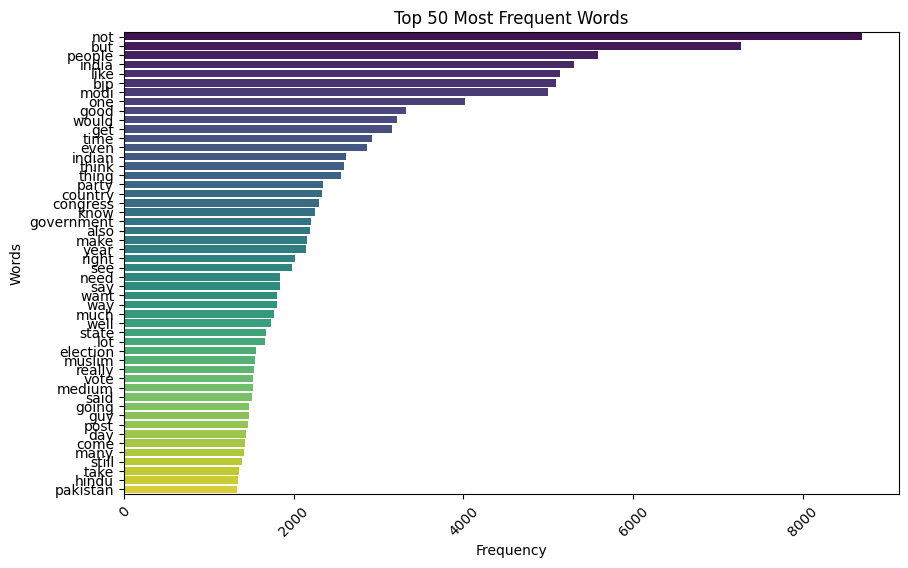

In [ ]:
# Most Occuring words
def plot_top_n_words(df, n=20):
  """Plot the top N most frequent words in the dataset"""

  # Flatten all the words in the content column
  words = ' '.join(df['clean_comment']).split()

  # Count the frequency of each word
  word_freq = Counter(words)

  # Get the top N most common words
  top_n_words = word_freq.most_common(n)

  # Split the words and their counts for plotting
  words, counts = zip(*top_n_words)

  # Create a bar plot
  plt.figure(figsize=(10, 6))
  sns.barplot(x=list(counts), y=list(words), palette='viridis')
  plt.title(f'Top {n} Most Frequent Words')
  plt.xlabel('Frequency')
  plt.ylabel('Words')
  plt.xticks(rotation=45)
  plt.show()

plot_top_n_words(df, n=50)


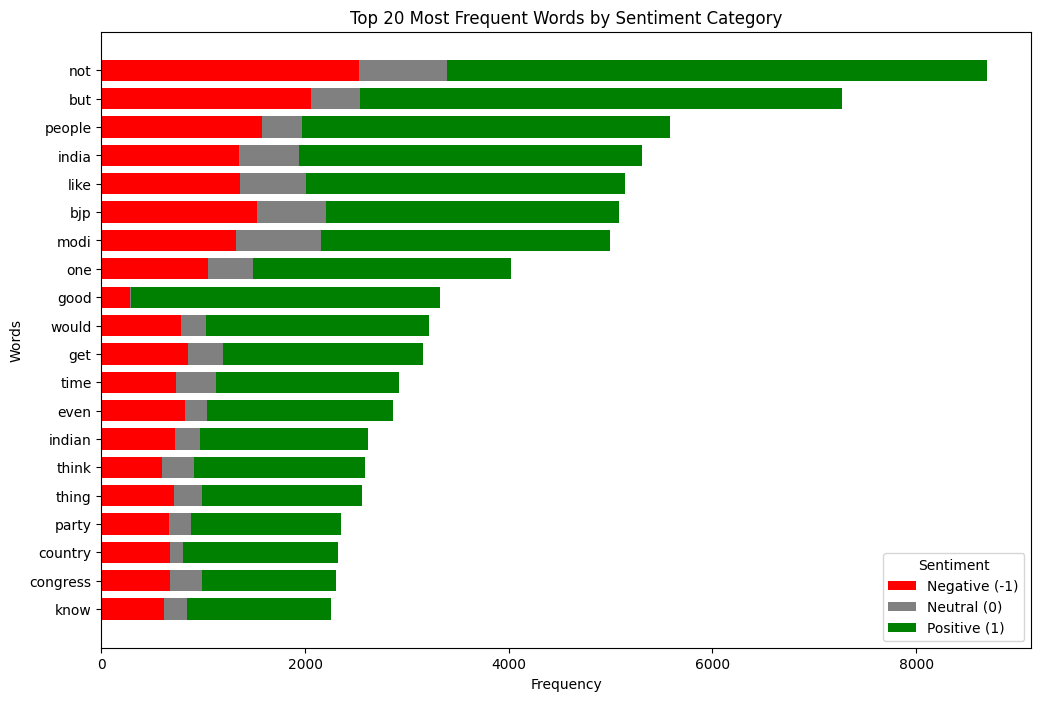

In [ ]:
def plot_top_n_word_by_category(df, n = 20, start = 0):
  """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category"""
  # Flatten all words in content column and count their occurences by category
  word_category_counts = {}

  for idx, row in df.iterrows():
    words = row['clean_comment'].split()
    category = str(row['category']) # Assuming 'category' column exists for -1, 0, 1 labels

    for word in words:
      if word not in word_category_counts:
        word_category_counts[word] = {'-1': 0, '0': 0, '1': 0}
      # Increment for corresponding sentiment category
      word_category_counts[word][category] += 1
  total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

  most_common_stop_word_freq = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
  top_words = [word for word, _ in most_common_stop_word_freq]

  # Prepare Data for plotting
  word_labels = top_words
  negative_counts = [word_category_counts[word]['-1'] for word in top_words]
  neutral_counts = [word_category_counts[word]['0'] for word in top_words]
  positive_counts = [word_category_counts[word]['1'] for word in top_words]

  # plot stacked bar chart
  plt.figure(figsize=(12, 8))
  bar_width = 0.75

  plt.barh(word_labels, negative_counts, label='Negative (-1)', color='red', height=bar_width)
  plt.barh(word_labels, neutral_counts, left=negative_counts, label='Neutral (0)', color='gray', height=bar_width)
  plt.barh(word_labels, positive_counts, left=[x + y for x, y in zip(negative_counts, neutral_counts)], label='Positive (1)', color='green', height=bar_width)

  plt.xlabel('Frequency')
  plt.ylabel('Words')
  plt.title(f'Top {n} Most Frequent Words by Sentiment Category')
  plt.legend(title='Sentiment', loc = 'lower right')
  plt.gca().invert_yaxis()
  plt.show()

plot_top_n_word_by_category(df, n=20)